<a href="https://colab.research.google.com/github/ShubhamSharma2003/YoutubeCommentSentimentAnalysis/blob/main/YoutubeCommentExtraction%26Analysis_21BEC1527.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Youtube Comments Extraction Using API & Performing Sentiment Analysis***

## Open Source Programming Club
```
Shubham Sharma - 21BEC1527
```


In [2]:
# Install necessaray packages
!pip install emoji
!pip install vaderSentiment

In [3]:
# Importing necessary modules
from googleapiclient.discovery import build
import pandas as pd
import re
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from urllib.parse import urlparse, parse_qs

###Imported Libraries Details

1. googleapiclient.discovery: This module is part of the Google API Client Library for Python and is used to create a service object for interacting with various Google APIs.

2. pandas: A powerful data manipulation library for Python that provides data structures like DataFrames, making it easier to work with structured data and perform data analysis.

3. re: The "re" module in Python provides regular expression matching operations, allowing you to search and manipulate strings based on specified patterns.

4. emoji: This library provides a set of tools for working with emojis in Python, allowing you to easily extract, modify, and manipulate emoji characters in strings.

5. vaderSentiment.vaderSentiment: This is a Python library that implements the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis algorithm. It is used to analyze and quantify the sentiment of text data.

6. matplotlib.pyplot: This module is part of the Matplotlib library, which is a popular data visualization library in Python. "pyplot" provides a collection of functions for creating static, animated, and interactive plots.

7. urllib.parse: This module provides functions to manipulate URLs and their components. In this case, the urlparse and parse_qs functions are used for parsing and extracting information from URLs.



### First, extract and load the youtube comments into a dataframe

In [4]:
# Get API key and service name
api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "****************************"

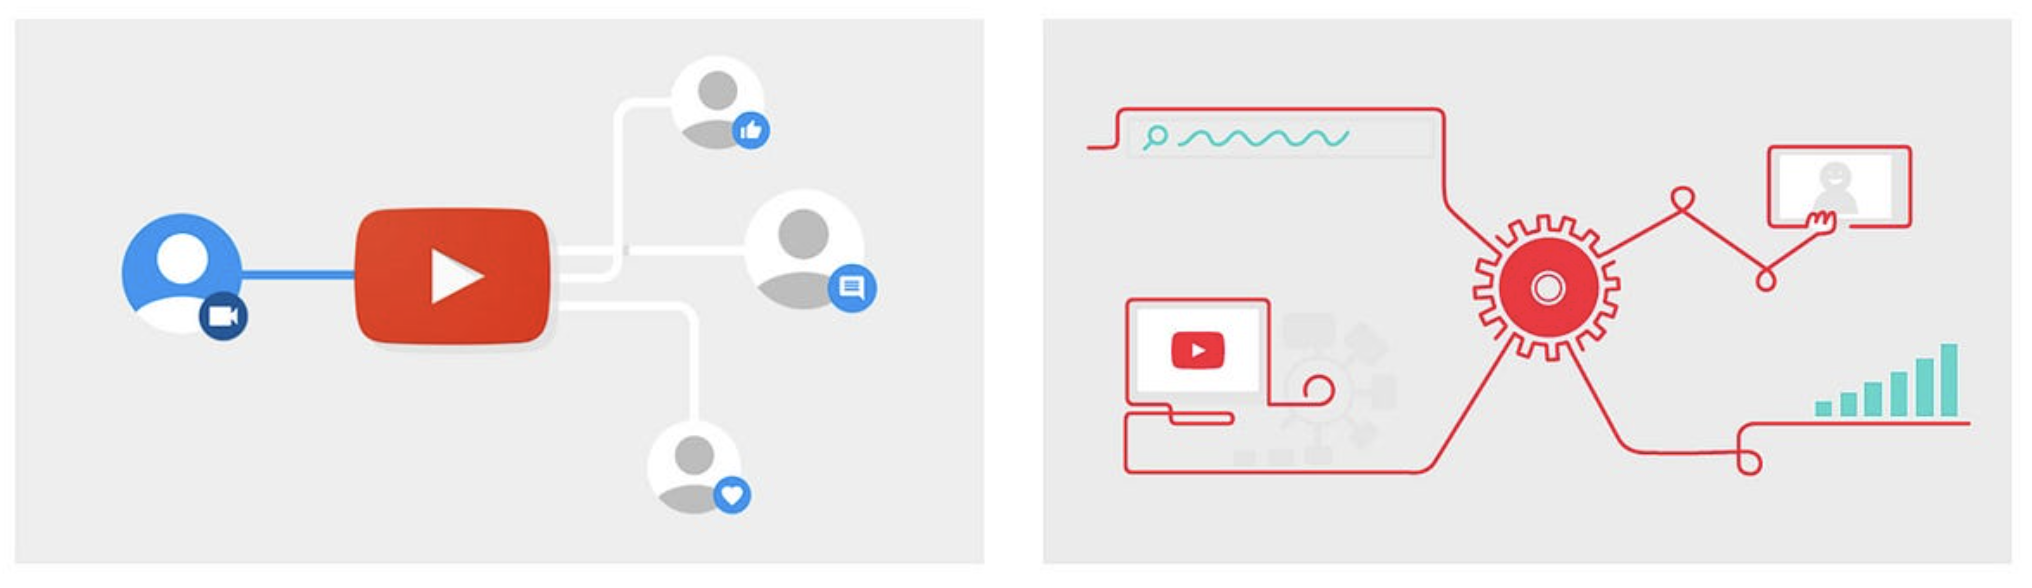

In [5]:
# Making a function to extract video_id from yt url

def extract_video_id(youtube_url):
    # Parse the URL
    parsed_url = urlparse(youtube_url)

    # Extract the video ID from the query parameters
    query_params = parse_qs(parsed_url.query)
    video_id = query_params.get('v', [None])[0]

    # If the video ID is not found in the query parameters, try extracting it from the path
    if not video_id:
        path_components = parsed_url.path.split('/')
        video_id = path_components[-1]

    return video_id

In [8]:
# Now, sending a request to the youtube client for comment threads extraction
youtube = build(api_service_name, api_version, developerKey=DEVELOPER_KEY)

# Taking input from the user and slice it for video id
video_url = input('Enter youtube video URL: ')
video_id = extract_video_id(video_url)
print("video id: " + video_id)

request = youtube.commentThreads().list(
    part="snippet",
    videoId=video_id,
    maxResults=100
)
try:
  response = request.execute()
  print('Comment data extracted from the URL')
except Exception as e:
  print('ERROR while requesting for data from the URL')

Enter youtube video URL: https://www.youtube.com/watch?v=TIO_S4BBfM4
video id: TIO_S4BBfM4
Comment data extracted from the URL


##Topic - Israel-Hamas war: Israeli Govt. on hostage operations

###Youtube Video URL used for Project - https://www.youtube.com/watch?v=TIO_S4BBfM4

In [10]:
# Checkout the response we got
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': '4EVYfdoimS_JgneDcBCK3qVlXIQ',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJa2dHQUFTQlFpZElCZ0JFZ1VJaHlBWUFCSUZDSWdnR0FBWUFDSU9DZ3dJNk16bnF3WVE4TVg5ckFN',
 'pageInfo': {'totalResults': 85, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': '0mIdun-K12n4EiUWh_gJvJM3DS8',
   'id': 'UgzyyPWkaH4kyXIK-bV4AaABAg',
   'snippet': {'channelId': 'UCJg9wBPyKMNA5sRDnvzmkdg',
    'videoId': 'TIO_S4BBfM4',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': 'SHU9InZxXqaBeL7Wlgg71RErDf4',
     'id': 'UgzyyPWkaH4kyXIK-bV4AaABAg',
     'snippet': {'channelId': 'UCJg9wBPyKMNA5sRDnvzmkdg',
      'videoId': 'TIO_S4BBfM4',
      'textDisplay': 'Excellent report . Papua New Guinea stands with Israel at UN. Praying for Israel .',
      'textOriginal': 'Excellent report . Papua New Guinea stands with Israel at UN. Praying for Israel .',
      'authorDisplayName': '@thomasabe46',
      'authorP

In [11]:
# Now, get all responses in a structured manner
import pandas as pd

comments = []
for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['updatedAt'],
        comment['likeCount'],
        comment['textDisplay']
    ])

# Create a dataframe for the data
comment_data = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

In [12]:
# Check out some data
comment_data.head(10)

,author,published_at,updated_at,like_count,text
0,@thomasabe46,2023-12-14T10:10:03Z,2023-12-14T10:10:03Z,0,Excellent report . Papua New Guinea stands wit...
1,@3_2_1,2023-12-14T10:09:34Z,2023-12-14T10:09:34Z,0,"lol, the moderator is as pathetic!"
2,@ayubi1900,2023-12-14T10:06:26Z,2023-12-14T10:06:26Z,0,I don&#39;t understand why Israel doesn&#39;t ...
3,@johnrogers5399,2023-12-14T09:51:25Z,2023-12-14T09:51:25Z,0,Thank you for the Truth and not antisemitic pr...
4,@sharonatwell,2023-12-14T09:50:14Z,2023-12-14T09:50:14Z,0,Liars Liars
5,@janyorke4358,2023-12-14T09:44:13Z,2023-12-14T09:44:13Z,0,Thank you Israel for being courageous ❤
6,@tovavaserzug8352,2023-12-14T09:28:39Z,2023-12-14T09:28:39Z,0,Isreal give a tast of there own meds to hamas
7,@sha8155,2023-12-14T09:25:15Z,2023-12-14T09:25:15Z,0,Isreal lies. Every year isreal attacks palesti...
8,@sha8155,2023-12-14T09:24:54Z,2023-12-14T09:24:54Z,0,Isrela zionist anti sematic lies.. To make reason
9,@sha8155,2023-12-14T09:24:03Z,2023-12-14T09:24:03Z,0,Distroy isreal terrosut


### Filter the data for sentimental analysis

In [13]:
# Get all comments from the data
comment_text_lst = comment_data['text']
comment_text_lst[:10]

0    Excellent report . Papua New Guinea stands wit...
1                   lol, the moderator is as pathetic!
2    I don&#39;t understand why Israel doesn&#39;t ...
3    Thank you for the Truth and not antisemitic pr...
4                                          Liars Liars
5              Thank you Israel for being courageous ❤
6        Isreal give a tast of there own meds to hamas
7    Isreal lies. Every year isreal attacks palesti...
8    Isrela zionist anti sematic lies.. To make reason
9                              Distroy isreal terrosut
Name: text, dtype: object

In [14]:
# Function to remove emojis
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Lowercase the text data, remove all punctuations and emojis
import string
relevant_comments = []

# Inside your loop that processes comments
for comment_text in comment_text_lst:
    comment_text = comment_text.lower().strip()
    comment_text = comment_text.translate(str.maketrans('', '', string.punctuation))
    comment_text = remove_emojis(comment_text)
    relevant_comments.append(comment_text)

# Print the relevant comments
relevant_comments[:5]

['excellent report  papua new guinea stands with israel at un praying for israel ',
 'lol the moderator is as pathetic',
 'i don39t understand why israel doesn39t stop war just for few days just to take hostages even if they freed palestinian hostages they can arrest them any time they want',
 'thank you for the truth and not antisemitic propaganda',
 'liars liars']

In [16]:
# Store all the preprocessed comments in a text file
f = open("ytcomments.txt", 'w', encoding='utf-8')
for idx, comment in enumerate(relevant_comments):
    f.write(str(comment)+"\n")
f.close()
print("Comments stored successfully!")

Comments stored successfully!


### Analyze the comments (doing sentimental analysis)

In [17]:
# Function to get analysis scores for the comments
def sentiment_scores(comment, polarity):
    # Creating a SentimentIntensityAnalyzer object.
    sentiment_object = SentimentIntensityAnalyzer()
    sentiment_dict = sentiment_object.polarity_scores(comment)
    polarity.append(sentiment_dict['compound'])
    return polarity

In [18]:
# Get polarity for each of the comments (positive, negative, neutral polarities are being worked upon here)
polarity = []
positive_comments = []
negative_comments = []
neutral_comments = []

# Get data from the text file
f = open("ytcomments.txt", 'r', encoding='`utf-8')
comments = f.readlines()
f.close()

print("Analysing Comments...")
for index, items in enumerate(comments):
    polarity = sentiment_scores(items, polarity)

    if polarity[-1] > 0.05:
        positive_comments.append(items)
    elif polarity[-1] < -0.05:
        negative_comments.append(items)
    else:
        neutral_comments.append(items)

# Print polarity
polarity[:10]

Analysing Comments...


[0.7351, -0.2263, -0.6705, 0.6747, -0.7783, 0.7096, 0.0, -0.6908, -0.6249, 0.0]

In [19]:
# Get comments with max polarity and min polarity
def get_min_max_comments(comments, polarity):
  pos_sentiment_comment = {
      'text': comments[polarity.index(max(polarity))],
      'score': max(polarity),
      'length': len(comments[polarity.index(max(polarity))])
  }

  neg_sentiment_comment = {
      'text': comments[polarity.index(min(polarity))],
      'score': min(polarity),
      'length': len(comments[polarity.index(min(polarity))])
  }

  return pos_sentiment_comment, neg_sentiment_comment

In [20]:
# Get average polarity, to check what kind of response did the video get as a whole
# Responses - (Positive, negative, neutral)

avg_polarity = sum(polarity)/len(polarity)
print("Average Polarity:", avg_polarity)
if avg_polarity > 0.05:
    print("The Video has got a Positive response")
elif avg_polarity < -0.05:
    print("The Video has got a Negative response")
else:
    print("The Video has got a Neutral response")

# Get most positive and most negative comments
pos_comment, neg_comment = get_min_max_comments(comments, polarity)

Average Polarity: -0.09026444444444448
The Video has got a Negative response


In [21]:
import textwrap
print(f"Best comment:\n{textwrap.fill(pos_comment['text'], 100)}\n")
print(f"Best comment score: {pos_comment['score']}")
print(f"Best comment length: {pos_comment['length']}")
print(f"\n\nWorst comment:\n{textwrap.fill(neg_comment['text'], 100)}\n")
print(f"Worst comment score: {neg_comment['score']}")
print(f"Worst comment length: {neg_comment['length']}")

Best comment:
prescious jesus we call for your intervention also send michael and his army to help your beloved
israel in this brutal war against hamasnot only israel needs you jesus but the whole world jesus i
pray for the families and friends of the brave fallen soldiers and the hostages prescious jesus
there is power in you name and there is power in your shed blood on calvary in fact lordthe whole
territory of israrl is quenched with the blood of jesus show forth your power lord it is your very
own peopleand we will not be ashamed of our godjesus you are the lifter of our headswe will not be
ashamed of our god we are more than conquerers through christ who strengthens us in  the name above
all names the name of yeshuah hamashea

Best comment score: 0.9656
Best comment length: 729


Worst comment:
how many lies have been told just since october 7th why should anyone believe what you say now yall
started killing civilians again israel decided those hostages lifes were39nt worth not b

### Get overall analysis of the results

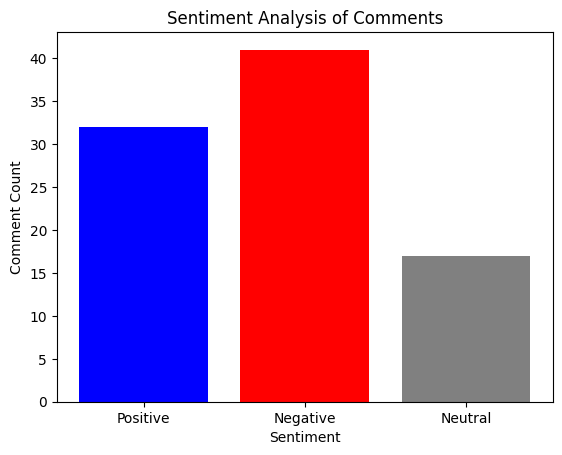

In [22]:
positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

# labels and data for Bar chart
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

# Creating bar chart
plt.bar(labels, comment_counts, color=['blue', 'red', 'grey'])

# Adding labels and title to the plot
plt.xlabel('Sentiment')
plt.ylabel('Comment Count')
plt.title('Sentiment Analysis of Comments')

# Displaying the chart
plt.show()

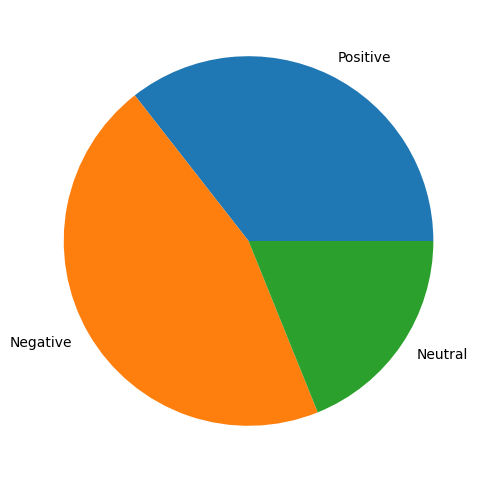

In [23]:
# labels and data for Bar chart
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

plt.figure(figsize=(10, 6)) # setting size

# plotting pie chart
plt.pie(comment_counts, labels=labels)

# Displaying Pie Chart
plt.show()